### **TITLE**
Machine Learning-Based Prediction of Lung Cancer Risk Using Demographic, Environmental, Lifestyle, and Health Factors.

### **Project** **Overview**
This project applies multiple machine learning algorithms (Logistic Regression, Support Vector Machine, Decision Tree, and Random Forest) to predict lung cancer risk using demographic, environmental, lifestyle, and health-related features.

The workflow includes:


1. Data Preprocessing & Exploration
2. Feature Grouping (Demographic, Environmental, Lifestyle, Health, All Combined)
3. Feature Data Visualization
4. Model Training & Hyperparameter Tuning
5. Performance Evaluation using Accuracy, Precision, Recall, and F1-score
6. Results Visualization
7. Conclusion



### **Objective**
To identify which feature groups and machine learning models provide the most reliable predictions of lung cancer risk, and to evaluate the potential of ML in supporting early detection and prevention strategies.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/cancer patient data sets.csv")

In [ ]:
pd.set_option("display.max_columns", None)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


In [ ]:
df['Level'].value_counts()

,count
Level,
High,365
Medium,332
Low,303


**(1) Visualization- Histplot: Age distribution of Cancer Patients**

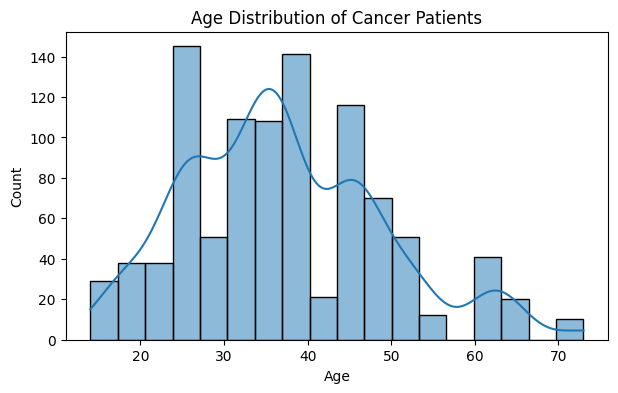

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(x='Age', data=df, kde=True)
plt.title('Age Distribution of Cancer Patients')
plt.show()

The age distribution indicates that the peak incidence of lung cancer starts in the late 20s and declines after late 40s. So, in this dataset the lung cancer appears more common among middle-aged patients and less common in older patients.

**(2) Visualization- Countplot: Gender Distribution of Cancer Patients**

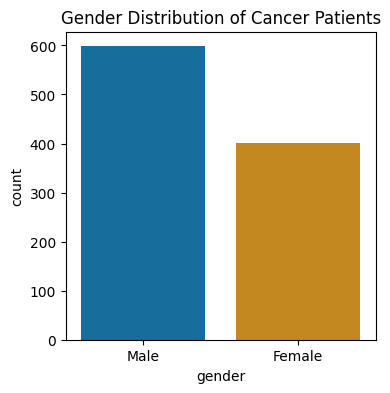

In [ ]:
gender = {1: 'Male', 2:'Female'}
df['gender'] = df['Gender'].map(gender)
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=df, hue='gender', palette='colorblind')
plt.title('Gender Distribution of Cancer Patients')
plt.show()

The gender distribution reveals that lung cancer incidence is higher in males than in females

**(3) Visualization- Bar Plot: Patient's Environmental factors vs Cancer Risk Level**

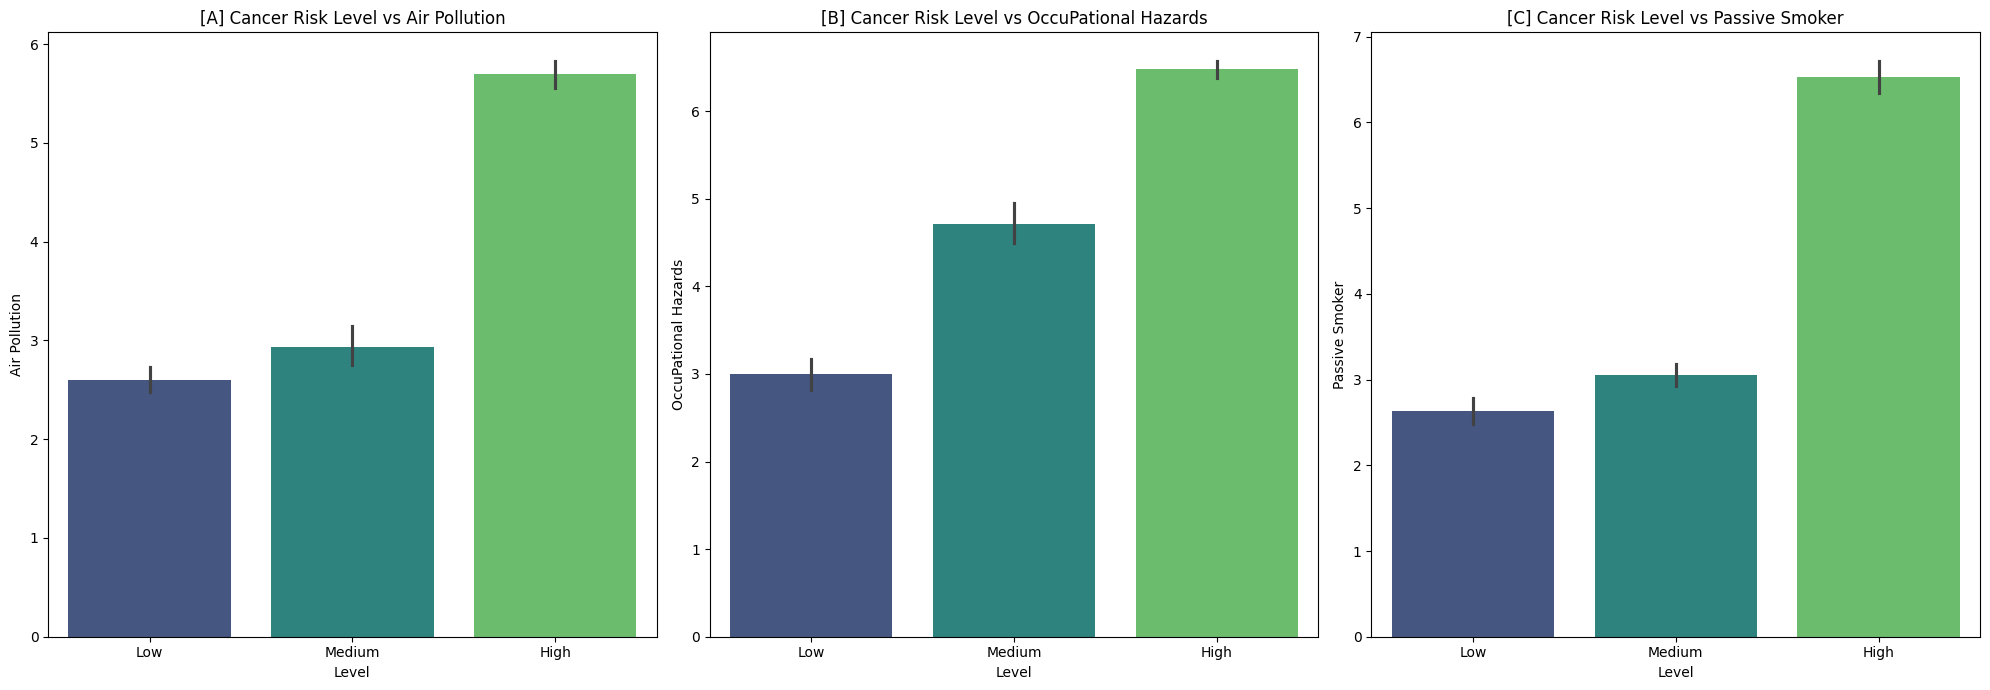

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)
sns.barplot(x='Level', y='Air Pollution', data=df, hue='Level', palette='viridis')
plt.title('[A] Cancer Risk Level vs Air Pollution')
plt.xlabel('Level')
plt.ylabel('Air Pollution')

plt.subplot(1, 3, 2)
sns.barplot(x='Level', y='OccuPational Hazards', data=df, hue='Level', palette='viridis')
plt.title('[B] Cancer Risk Level vs OccuPational Hazards')
plt.xlabel('Level')
plt.ylabel('OccuPational Hazards')

plt.subplot(1, 3, 3)
sns.barplot(x='Level', y='Passive Smoker', data=df, hue='Level', palette='viridis')
plt.title('[C] Cancer Risk Level vs Passive Smoker')
plt.xlabel('Level')
plt.ylabel('Passive Smoker')
plt.tight_layout()
plt.show()

Patients exposed to high levels of environmental factors such as air pollution, occupational hazards, and passive smoking have a higher risk of developing lung cancer.

**(4) Visualization- Box Plot: Patient's Lifestyle factors vs Cancer Risk Level**

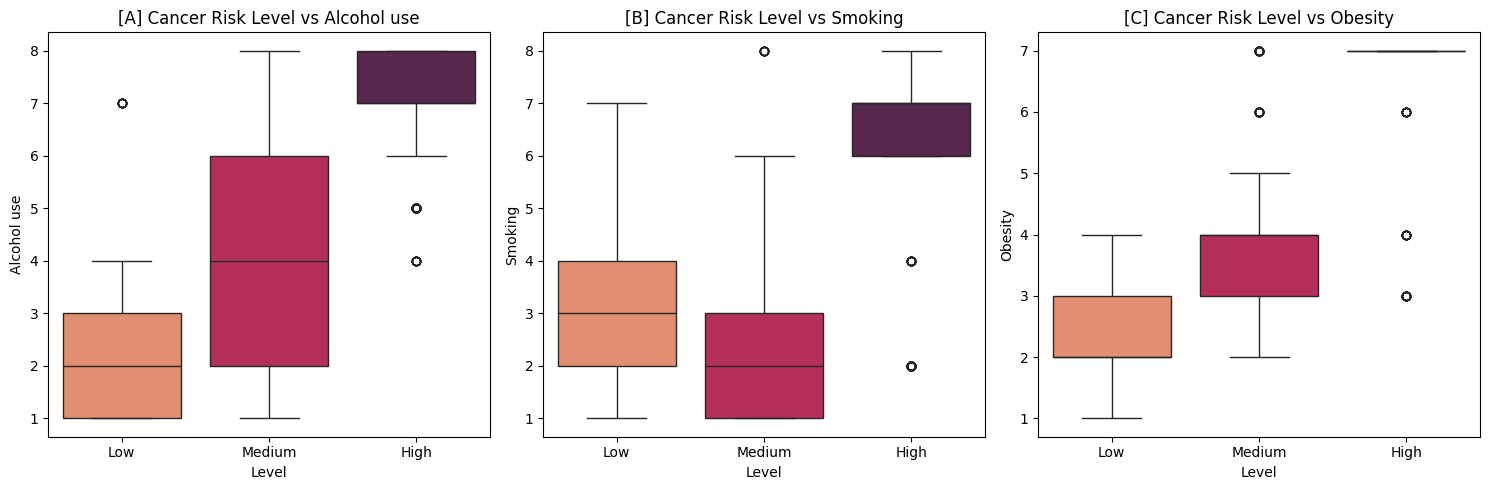

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Level', y='Alcohol use', data=df, hue='Level', palette='rocket_r')
plt.title('[A] Cancer Risk Level vs Alcohol use')
plt.xlabel('Level')
plt.ylabel('Alcohol use')

plt.subplot(1, 3, 2)
sns.boxplot(x='Level', y='Smoking', data=df, hue='Level', palette='rocket_r')
plt.title('[B] Cancer Risk Level vs Smoking')
plt.xlabel('Level')
plt.ylabel('Smoking')

plt.subplot(1, 3, 3)
sns.boxplot(x='Level', y='Obesity', data=df, hue='Level', palette='rocket_r')
plt.title('[C] Cancer Risk Level vs Obesity')
plt.xlabel('Level')
plt.ylabel('Obesity')
plt.tight_layout()
plt.show()

Higher levels of smoking, alcohol use and obesity are associated with an increased risk of lung cancer.

**(5) Visualization- Violin Plot: Patient's Health factors vs Cancer Risk Level**

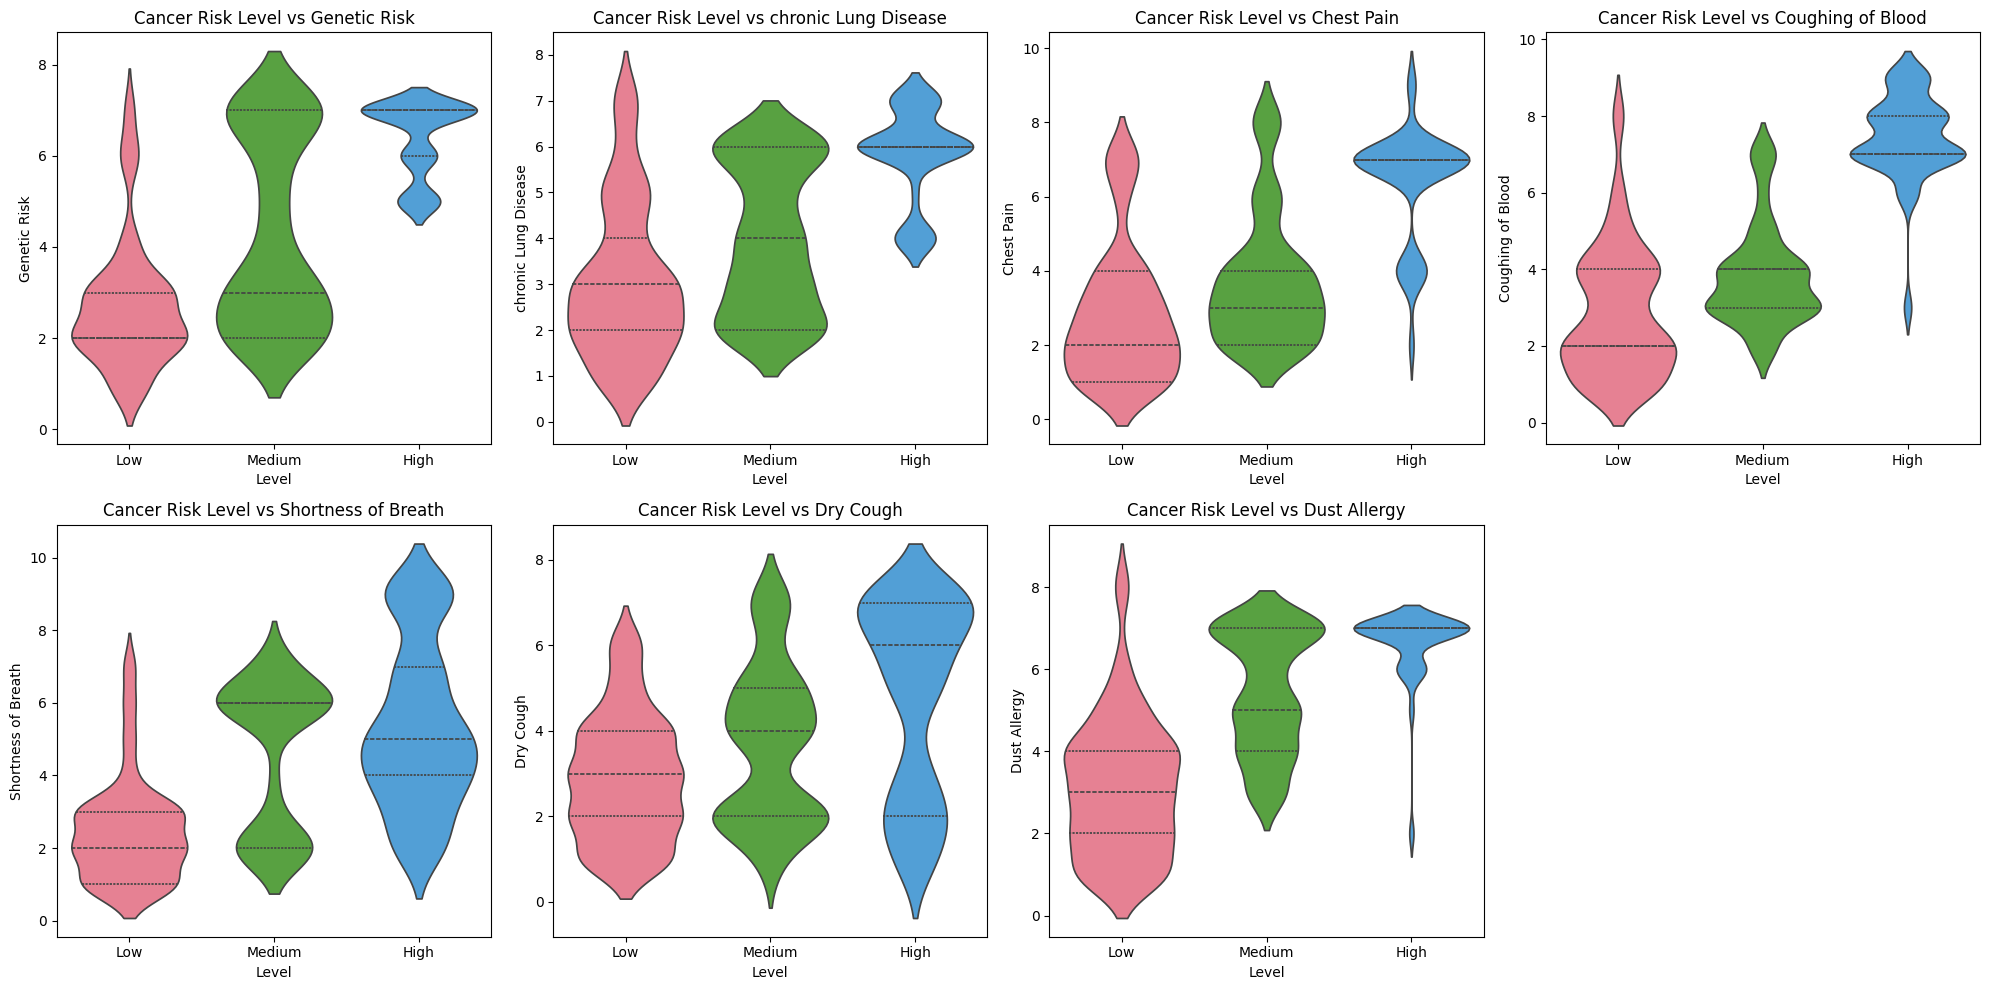

In [ ]:
var = ['Genetic Risk', 'chronic Lung Disease', 'Chest Pain', 'Coughing of Blood','Shortness of Breath', 'Dry Cough', 'Dust Allergy']

plt.figure(figsize=(20,10))
for i in range(len(var)):
  plt.subplot(2, 4, i+1)
  sns.violinplot(x='Level', y=var[i], data=df, hue='Level',inner='quartile', palette='husl')
  plt.title('Cancer Risk Level vs '+ var[i])
plt.tight_layout()
plt.show()



* Genetic Risk, Chronic Lung Disease, Coughing of Blood, Dry Cough, Chest Pain, Shortness of Breath, and Dust Allergy are generally higher in High risk patients.
* Among these, Coughing of Blood, Chest Pain, and Shortness of Breath are strong indicators of high cancer risk, showing higher severity mainly in high-risk patients.



**(6) Visualization- Heatmap**

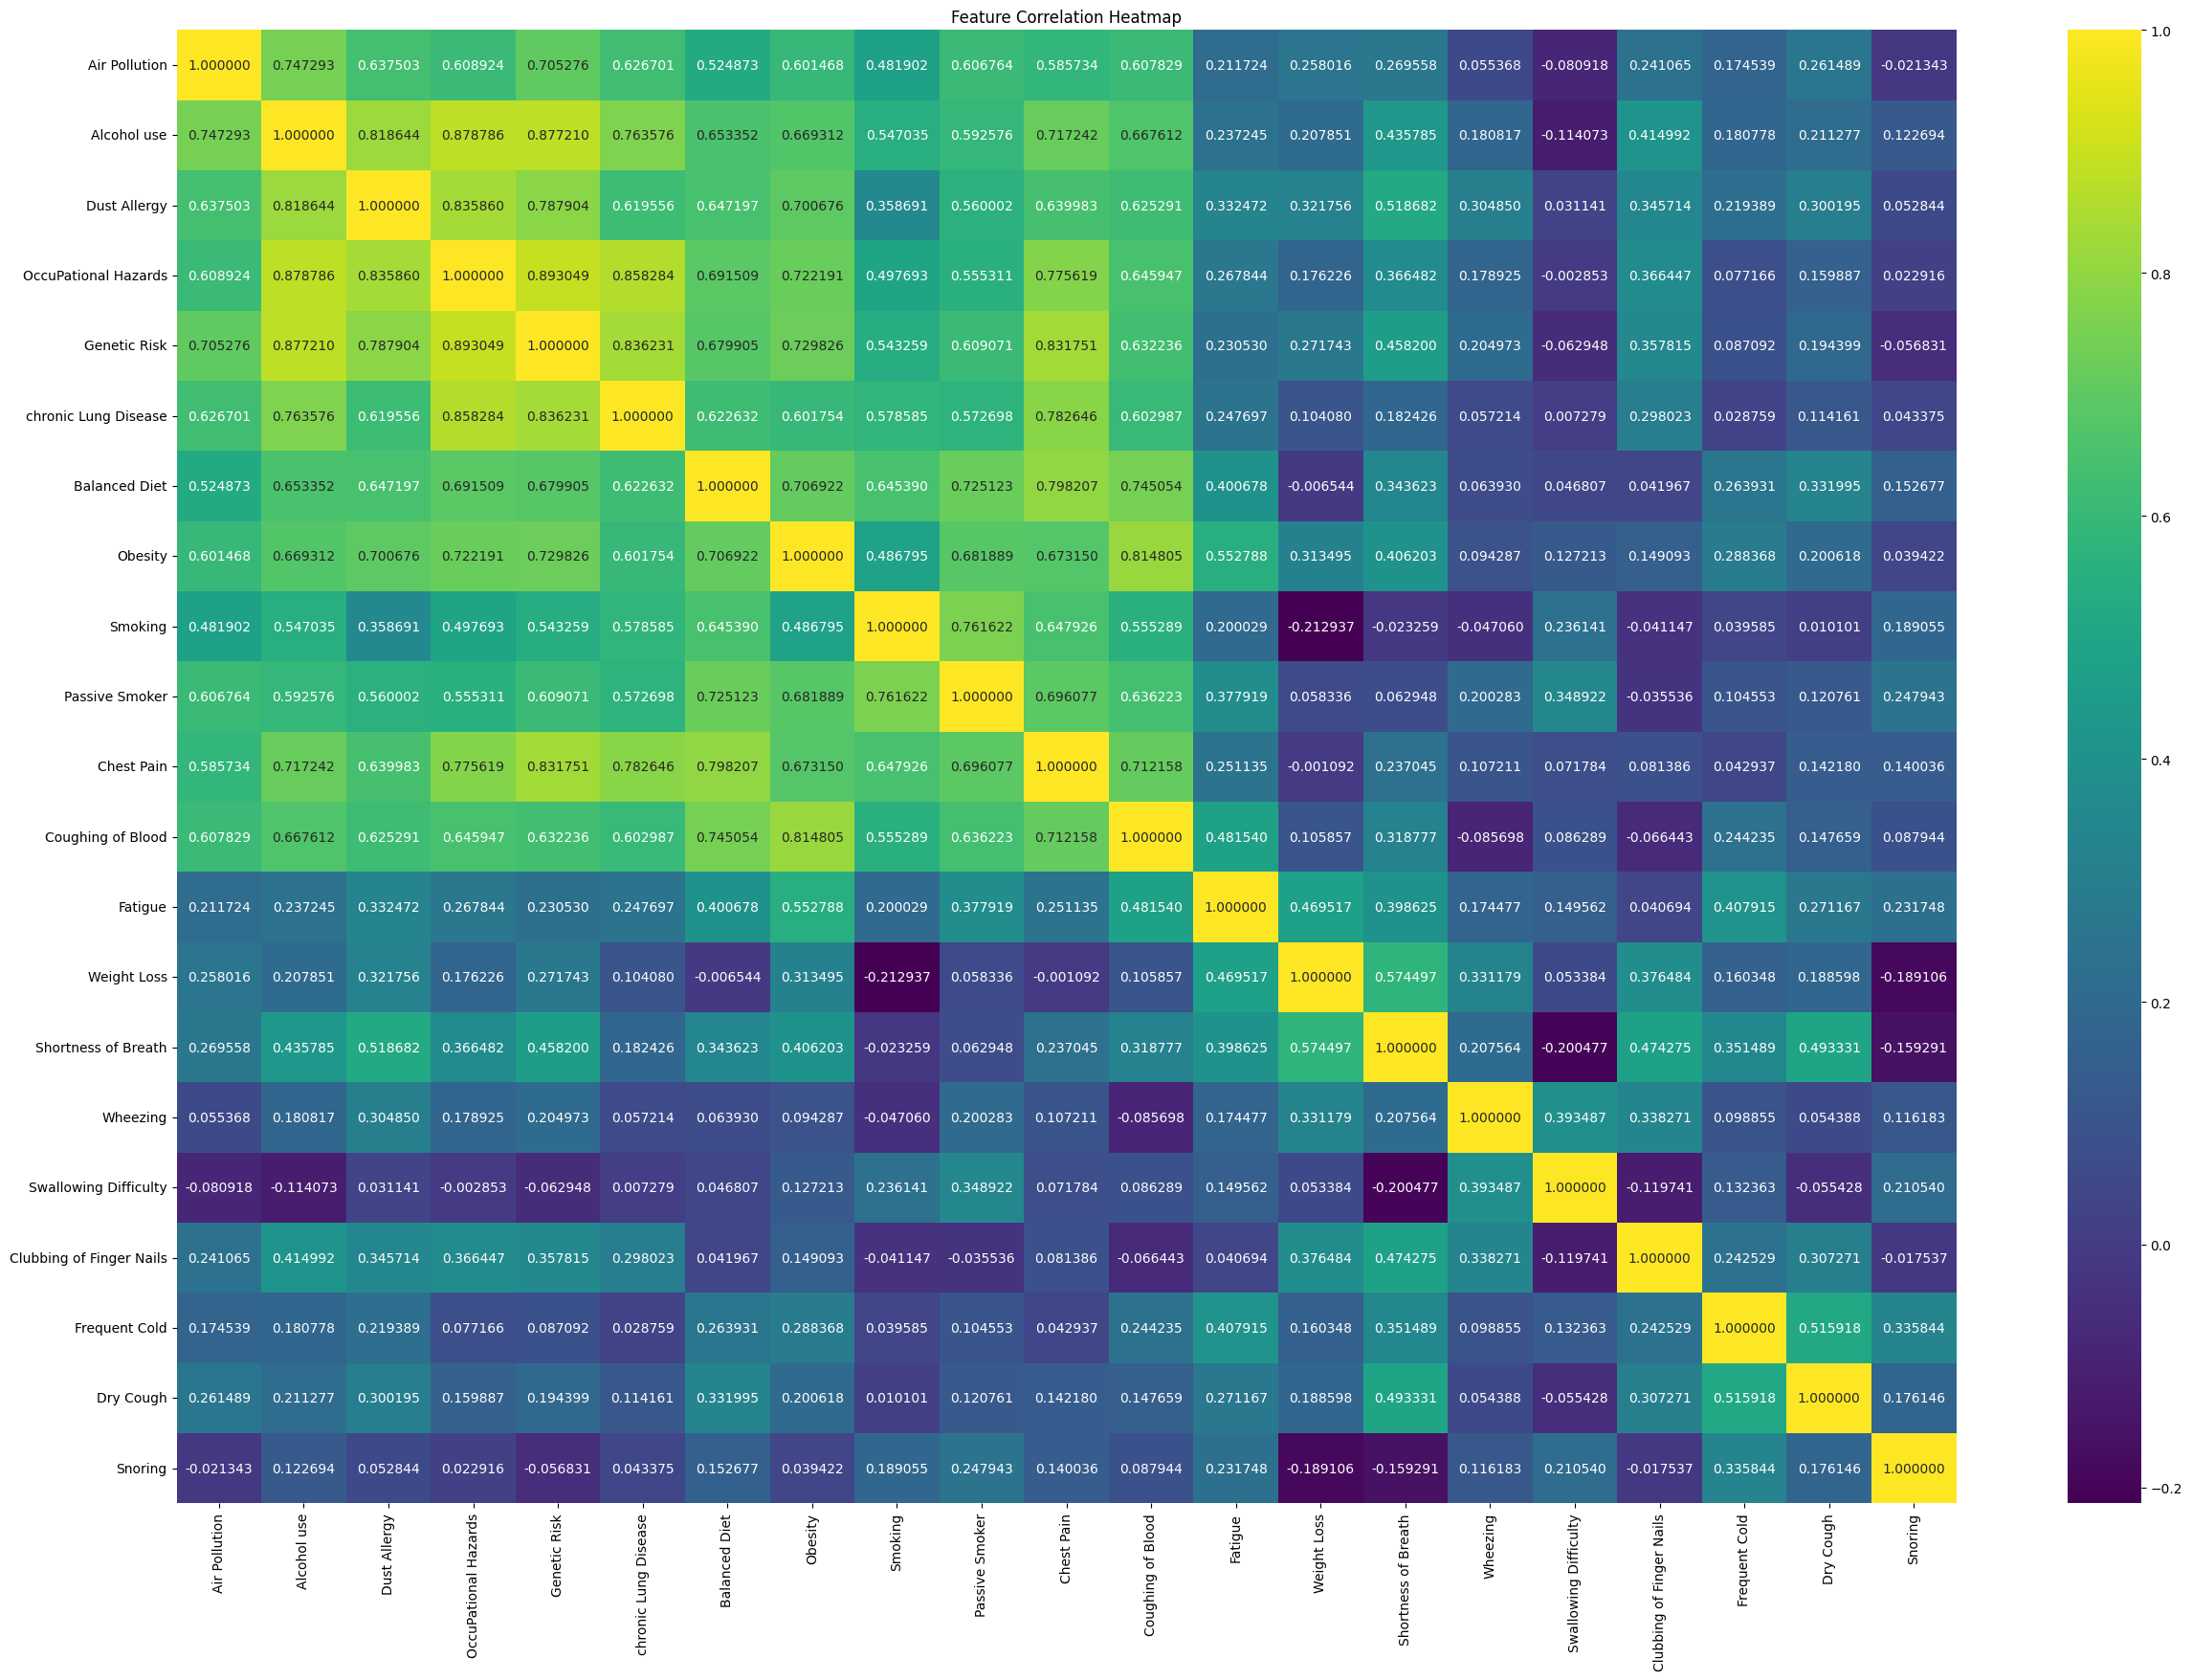

In [ ]:
li = ['index','Patient Id', 'Age', 'Gender', 'Level', 'gender']
plt.figure(figsize=(30,20))
corr = df.drop(columns=li).corr()
sns.heatmap(corr, annot=True, cmap='viridis', fmt= '2f')
plt.title('Feature Correlation Heatmap')
plt.show()

The heatmap reveals significant positive correlations among several features, particularly within environmental factors, lifestyle factors and health factors.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Feature Encoding

In [ ]:
order = OrdinalEncoder(categories= [["Low", "Medium", "High"]])
df["Level"] = order.fit_transform(df[["Level"]])

In [ ]:
df.drop(columns=["index","Patient Id"], inplace=True)

Feature Selection

In [ ]:
demographic = ['Age','Gender']
environmental = ['Air Pollution','OccuPational Hazards','Passive Smoker']
lifestyle = ['Alcohol use', 'Smoking', 'Obesity']
health = ['Genetic Risk', 'chronic Lung Disease', 'Chest Pain', 'Coughing of Blood','Shortness of Breath', 'Dry Cough', 'Dust Allergy']
all_features = demographic + environmental + lifestyle + health
X = df[all_features]
y = df['Level']

**Model Training & Evaluation: Logistic Regression, SVM, Decision Tree, and Random Forest**

In [ ]:
def train_models(feature_list, name):
    print(f"# {name} Features")

    X_group = df[feature_list]

    X_train, X_test, y_train, y_test = train_test_split(X_group, y, test_size=0.2, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    fig, axes = plt.subplots(2, 2, figsize=(10, 7))
    axes = axes.flatten()

    metrics_list = []

# LOGISTIC REGRESSION
    lr = LogisticRegression(max_iter=2000)
    lr.fit(X_train_scaled, y_train)
    y_pred = lr.predict(X_test_scaled)
    metrics_list.append({"Feature name": name,"Model": "Logistic Regression", "Accuracy": accuracy_score(y_test, y_pred),"Recall": recall_score(y_test, y_pred, average='weighted'),
                         "Precision": precision_score(y_test, y_pred, average='weighted'),"F1 Score": f1_score(y_test, y_pred, average='weighted')})
    print("Logistic Regression- Accuracy:", accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[0],cmap='Oranges')
    axes[0].set_title("[a] Confusion Matrix - Logistic Regression")

#SVM
    param_grid_svm = {'kernel': ['linear', 'rbf'], 'C': [0.1, 1, 10], 'gamma': ['scale', 1, 0.1, 0.01]}
    svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
    svm.fit(X_train_scaled, y_train)
    best_svm = svm.best_estimator_
    y_pred = best_svm.predict(X_test_scaled)
    metrics_list.append({"Feature name": name,"Model": "SVM", "Accuracy": accuracy_score(y_test, y_pred),"Recall": recall_score(y_test, y_pred, average='weighted'),
                         "Precision": precision_score(y_test, y_pred, average='weighted'),"F1 Score": f1_score(y_test, y_pred, average='weighted')})
    print("SVM- Accuracy:", accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[1],cmap='Oranges')
    axes[1].set_title("[b] Confusion Matrix - SVM")

#DECISION TREE
    param_grid_dt = {'max_depth': [None, 5, 10, 20],'min_samples_split': [2, 5, 10]}
    dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy')
    dt.fit(X_train, y_train)
    best_dt = dt.best_estimator_
    y_pred = best_dt.predict(X_test)
    metrics_list.append({"Feature name": name,"Model": "Decision Tree", "Accuracy": accuracy_score(y_test, y_pred),"Recall": recall_score(y_test, y_pred, average='weighted'),
                         "Precision": precision_score(y_test, y_pred, average='weighted'),"F1 Score": f1_score(y_test, y_pred, average='weighted')})
    print("Decision Tree- Accuracy:", accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[2],cmap='Oranges')
    axes[2].set_title("[c] Confusion Matrix - Decision Tree")

#RANDOM FOREST
    param_grid_rf = {'n_estimators': [100, 200, 300],'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10]}
    rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
    rf.fit(X_train, y_train)
    best_rf = rf.best_estimator_
    y_pred = best_rf.predict(X_test)
    metrics_list.append({"Feature name": name,"Model": "Random Forest", "Accuracy": accuracy_score(y_test, y_pred),"Recall": recall_score(y_test, y_pred, average='weighted'),
                         "Precision": precision_score(y_test, y_pred, average='weighted'),"F1 Score": f1_score(y_test, y_pred, average='weighted')})
    print("Random forest- Accuracy:", accuracy_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[3],cmap='Oranges')
    axes[3].set_title("[d] Confusion Matrix - Random Forest")

    plt.tight_layout()
    plt.show()

    return metrics_list

**(a) Analyzing Model Performance: Demographic Features**

# Demographic Features
Logistic Regression- Accuracy: 0.455
SVM- Accuracy: 0.515
Decision Tree- Accuracy: 0.675
Random forest- Accuracy: 0.675


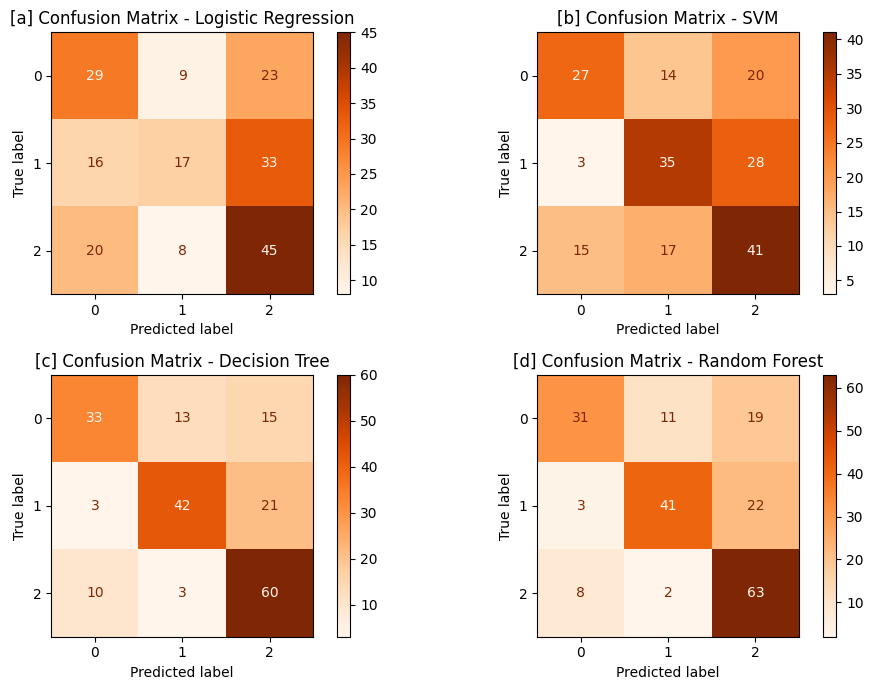

In [ ]:
demographic_metrics = train_models(demographic, "Demographic")

 * Models trained on only demographic features were ineffective with a highest accuracy of 67.5%. Logistic Regression and SVM performed poorly with low accuracy.
* This suggests that demographic data alone is an insufficient predictor for lung cancer risk in this dataset.



**(b) Analyzing Model Performance: Environmental Features**

# Environmental Features
Logistic Regression- Accuracy: 0.735
SVM- Accuracy: 0.89
Decision Tree- Accuracy: 0.89
Random forest- Accuracy: 0.89


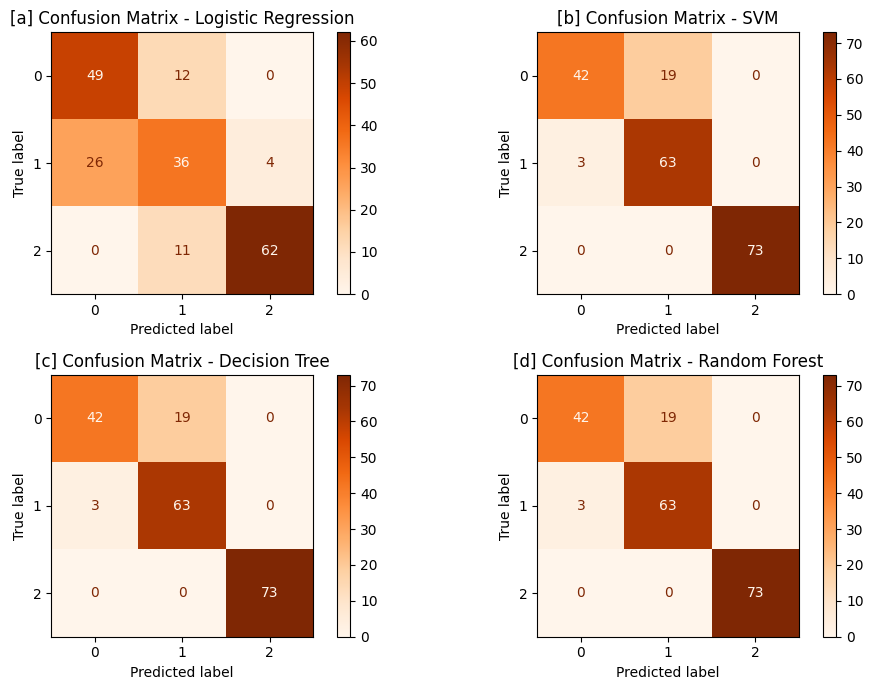

In [ ]:
environmental_metrics = train_models(environmental, "Environmental")



* Models trained on Environmental Features performed significantly better, with SVM, Decision Tree, and Random Forest all achieving 89% accuracy.
* This shows that environmental factors are much stronger predictor of lung cancer risk than demographic features.



**(c) Analyzing Model Performance: Lifestyle Features**

# Lifestyle Features
Logistic Regression- Accuracy: 0.74
SVM- Accuracy: 0.975
Decision Tree- Accuracy: 0.975
Random forest- Accuracy: 0.975


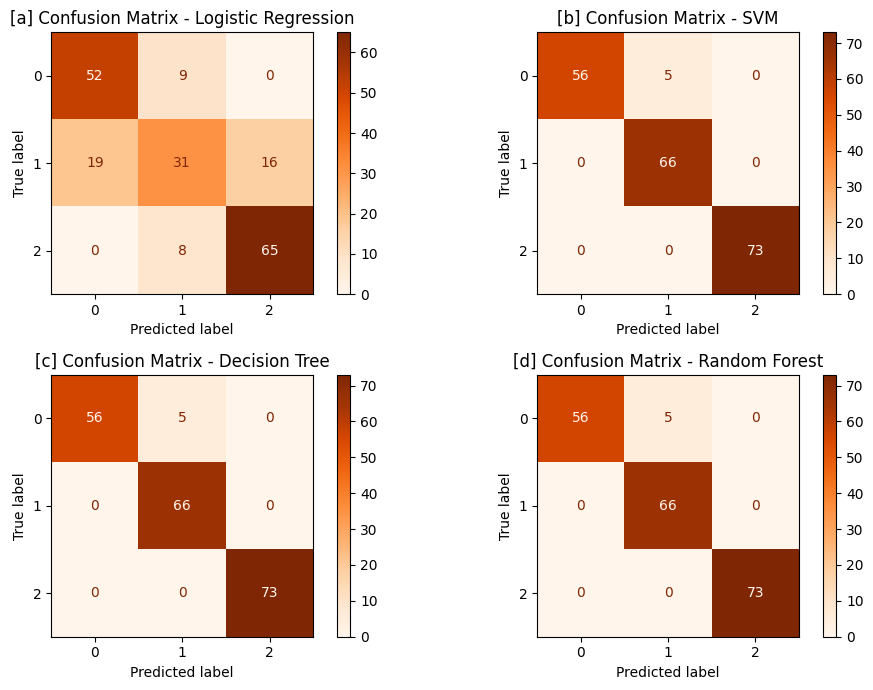

In [ ]:
lifestyle_metrics = train_models(lifestyle, "Lifestyle")



* Models trained on Lifestyle Features were highly effective, with SVM, Decision Tree, and Random Forest all achieving 97.5% accuracy.
* This shows that lifestyle factors are extremely strong predictors of lung cancer risk in this dataset.



**(d) Analyzing Model Performance: Health Features**

# Health Features
Logistic Regression- Accuracy: 0.83
SVM- Accuracy: 1.0
Decision Tree- Accuracy: 1.0
Random forest- Accuracy: 1.0


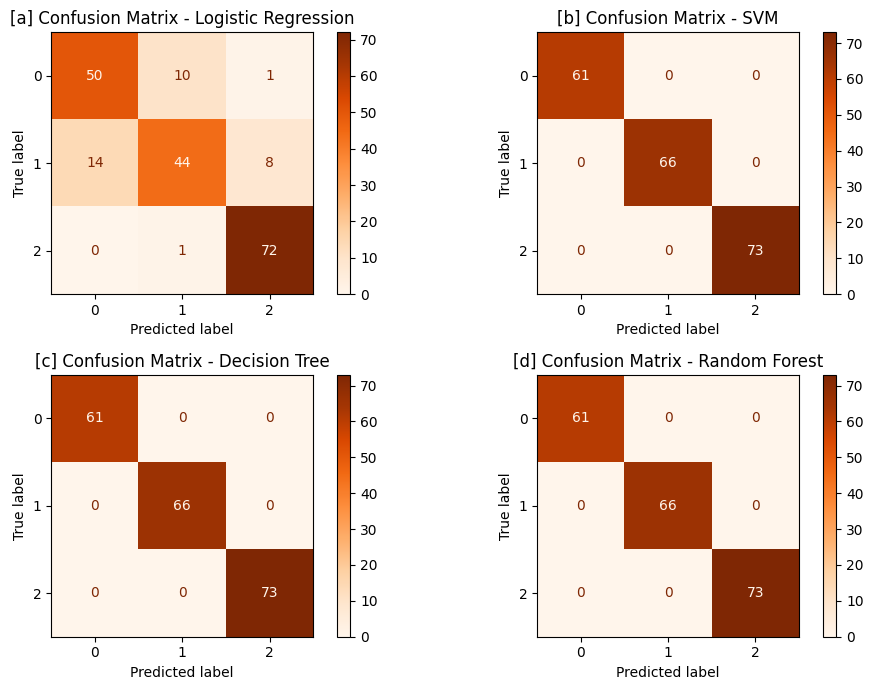

In [ ]:
health_metrics = train_models(health, "Health")

Models trained on health Features achieved 100% accuracy for SVM, Decision Tree, and Random Forest. This demonstrates that health-related factors are a perfect predictor of lung cancer risk in this dataset.

**(e) Analyzing Model Performance: All combined Features**

# All Combined Features
Logistic Regression- Accuracy: 0.93
SVM- Accuracy: 0.995
Decision Tree- Accuracy: 0.99
Random forest- Accuracy: 1.0


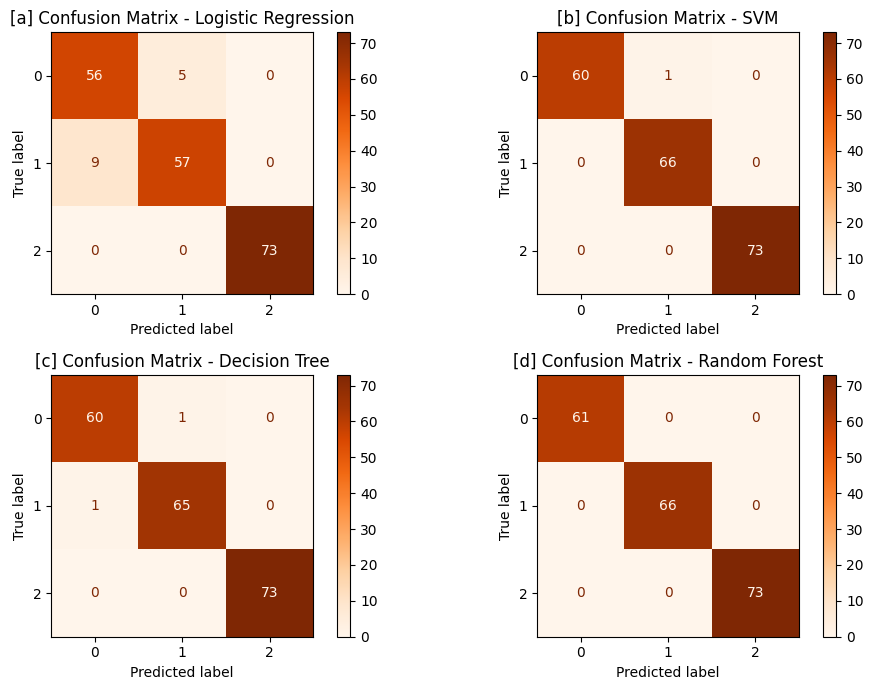

In [ ]:
all_combined_metrics = train_models(all_features, "All Combined")



* By combining all the features, the models demonstrated an high level of performance.
* SVM and Decision Tree models were also accurate showing an accuracy of about 99%.
* Hence, all combined factors are also the most effective predictors of lung cancer risk.






In [ ]:
all_metrics = demographic_metrics + environmental_metrics + lifestyle_metrics + health_metrics + all_combined_metrics
summary = pd.DataFrame(all_metrics)
summary_table = summary.style.set_caption("Model Performance Summary").set_properties(**{"text-align": "center"}).set_table_styles([
    {"selector":"caption", "props": [("text-align", "center"),("font-size", "20px"),("margin-bottom", "20px")]}])
summary.index = summary.index + 1
summary_table

,Feature name,Model,Accuracy,Recall,Precision,F1 Score
1,Demographic,Logistic Regression,0.455000,0.455000,0.463701,0.441390
2,Demographic,SVM,0.515000,0.515000,0.526146,0.515130
3,Demographic,Decision Tree,0.675000,0.675000,0.685895,0.670851
4,Demographic,Random Forest,0.675000,0.675000,0.696780,0.668923
5,Environmental,Logistic Regression,0.735000,0.735000,0.743501,0.735471
6,Environmental,SVM,0.890000,0.890000,0.903203,0.887644
7,Environmental,Decision Tree,0.890000,0.890000,0.903203,0.887644
8,Environmental,Random Forest,0.890000,0.890000,0.903203,0.887644
9,Lifestyle,Logistic Regression,0.740000,0.740000,0.729407,0.727894
10,Lifestyle,SVM,0.975000,0.975000,0.976761,0.974922


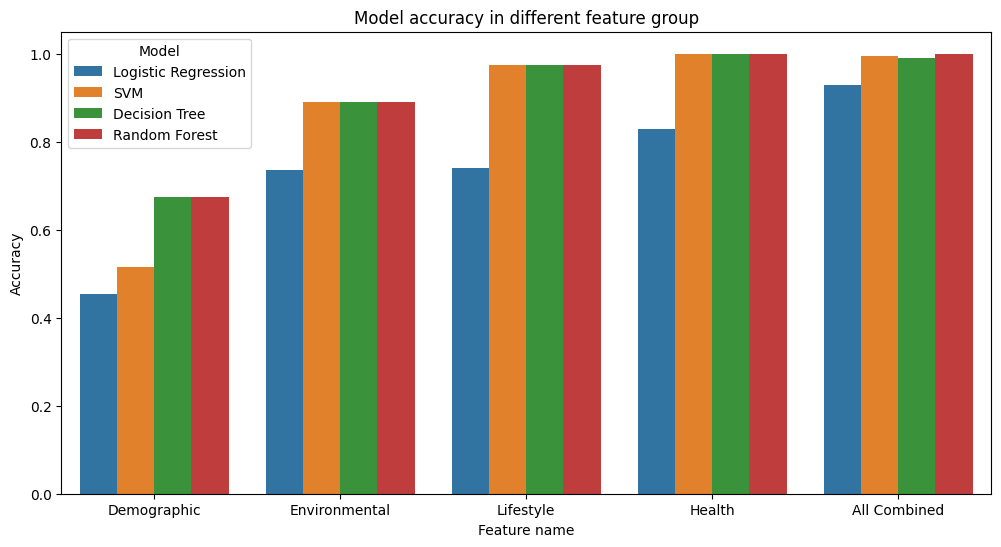

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=summary, x="Feature name", y="Accuracy", hue="Model")
plt.title("Model accuracy in different feature group")
plt.legend(title="Model")
plt.show()



* Models trained on Health, Lifestyle and all combined features achieve the highest accuracy (up to 100%) and are the strongest predictors of lung cancer risk.
* SVM, Decision Tree, and Random Forest, perform exceptionally well on these features.
* Demographic features are the least effective predictors.





# **CONCLUSION**

In this project, multiple machine learning models were applied to demographic, environmental, lifestyle, health-related features and all combined features to predict lung cancer risk. The results demonstrated that model performance varied depending on the feature group used:

*   Demographic features alone yielded relatively low predictive power with Decision Tree and Random Forest slightly outperforming Logistic Regression and SVM.
*   Environmental and Lifestyle features provided much stronger predictive ability, with SVM, Decision Tree, and Random Forest achieving accuracies close to 0.90-0.97.
*   Health-related features achieved the highest performance, with all models reaching perfect classification scores, suggesting strong predictive potential but also the possibility of overfitting.
*   When all feature groups were combined, performance was further enhanced, with Random Forest and SVM delivering near-perfect results (accuracy >= 0.99).

Overall, the study highlights that incorporating a broad spectrum of risk factors—particularly health, lifestyle, and environmental features improves accuracy compared to demographic data alone.